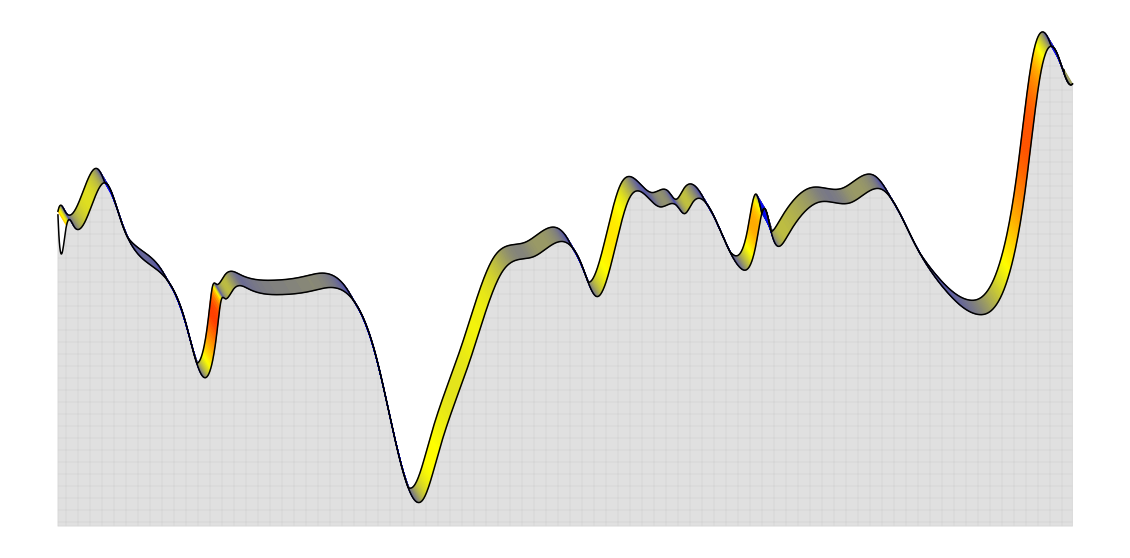

In [10]:
from scipy.interpolate import UnivariateSpline
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift
from matplotlib.colors import Normalize,LinearSegmentedColormap
from matplotlib.patches import Polygon

tree = ET.parse("./test.gpx")

all_altitudes = []

for element in tree.iter():
    if element.tag == '{http://www.topografix.com/GPX/1/1}ele':
        all_altitudes.append(float(element.text))

y = np.array(all_altitudes)
x = np.array([i for i,j in enumerate(y)])

spl = UnivariateSpline(x,y,s=len(all_altitudes)*50)
splined_y = spl(x)

# offset and spline smoothing have to be proportional to the number of points

offset = len(all_altitudes)/150
offset_y = shift(splined_y,-int(offset*1.3)) + offset

for index,(normal,offset_value) in enumerate(zip(splined_y,offset_y)):
    if offset_value < normal:
        offset_y[index] = splined_y[index]

gradient = np.gradient(splined_y)
norm = Normalize(vmin=-5,vmax=5)
colors = ['green','blue','yellow','red']
my_map = LinearSegmentedColormap.from_list('greenred',colors)
cmap = plt.get_cmap("terrain")
cols = my_map(norm(gradient))

fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(111) 

ax.plot(x,splined_y,'black')
ax.plot(x,offset_y,'black')
ax.fill_between(x,plt.gca().get_ylim()[0],splined_y,color='lightgrey',alpha=0.7,hatch="+")

offset = int(offset*1.3)

for k in range(offset,len(x)-1):
    origin = [k,splined_y[k]]
    bottom_right = [k+1,splined_y[k+1]]
    top_right = [k+1-offset,offset_y[k+1-offset]]
    top_left = [k-offset,offset_y[k-offset]]
    all_points = [origin,bottom_right,top_right,top_left]
    poly = Polygon(all_points,color=cols[k])
    ax.add_patch(poly)

plt.axis('off')
plt.show()   